<a href="https://colab.research.google.com/github/nutyfreshz/MADT8101_Customer_Analytics/blob/main/EP_11_12_Product_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Product recommendation**

## **1.1 What is product recommendation**

A product recommendation is a filtering system aiming to predict and display items a user would likely purchase, even if not entirely accurate.

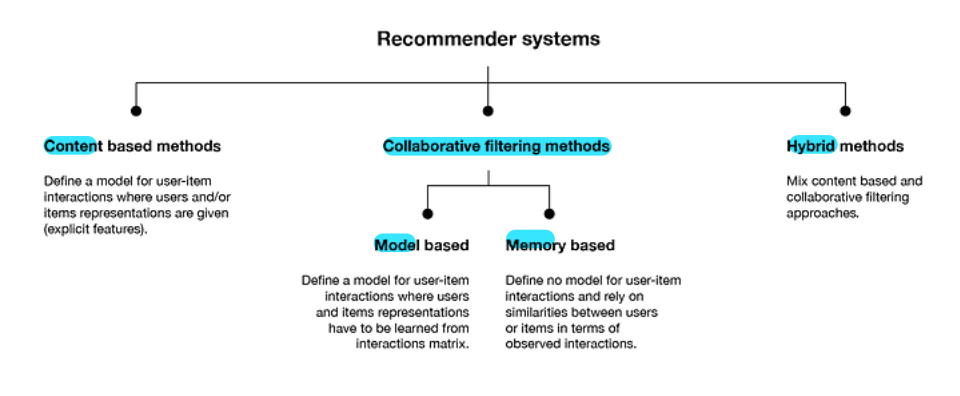

## **1.2 Types of recommendations**

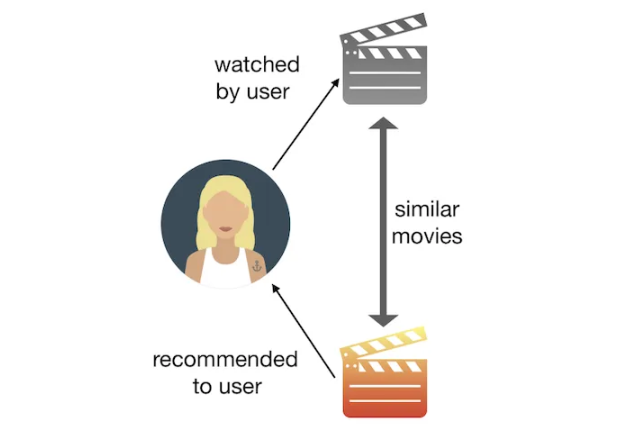

  1. **Content-Based Filtering:** Content-based filtering is a recommendation method based on item attributes and characteristics to suggest similar items matching users' preferences.
------

**User-based**

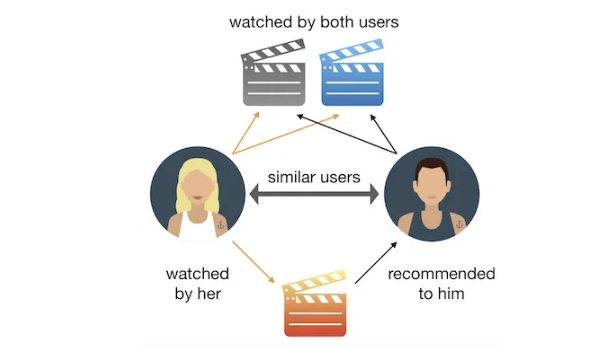

**Item-based**

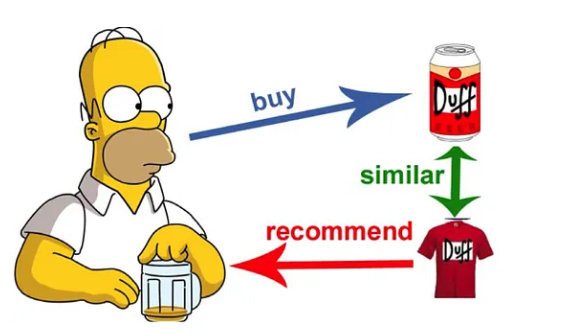

  2. **Collaborative Filtering:** Collaborative filtering is a recommendation technique based on user interactions and preferences to suggest items similar users have liked or purchased.

-------

  3. **Hybrid Recommendation Systems:** Hybrid recommendation systems combine various techniques (collaborative filtering and content-based filtering) to improve recommendation accuracy and coverage, offering personalized suggestions to users.

## **1.3 Code for Reccomender System**

### **1.3.1 Prepare data for create recommender system**

#### **Data Model for create recommender**

In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

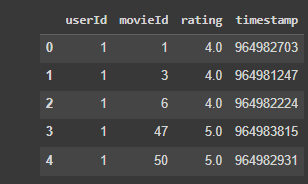

In [ ]:
movies = pd.read_csv('movies.csv')
movies.head()

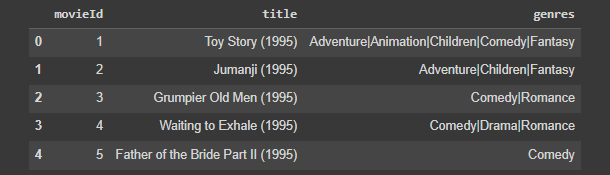

#### **Requirement for create Recommender system**

 * LightFM (For Create Model)
 * recsys.py & generic_preprocessing.py (Prepare data for feeding LightFM)

In [ ]:
!pip install lightfm

from recsys import *
from generic_preprocessing import *

In this case, our data have explicit rating to calcualte the model.

#### **Prepare data before create recommender model**

In [ ]:
# Prepare interaction matrix for model
interactions = create_interaction_matrix(df = ratings,
                                         user_col = 'userId',
                                         item_col = 'movieId',
                                         rating_col = 'rating')
interactions.head()

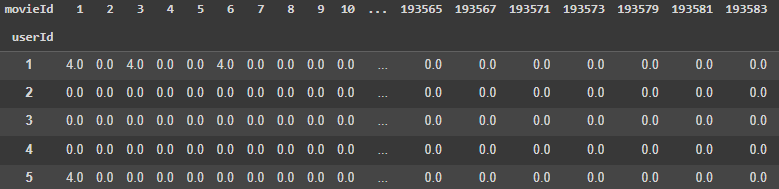

In [ ]:
# Prepare user_dict & movies_dict for model
user_dict = create_user_dict(interactions = interactions)

movies_dict = create_item_dict(df = movies,
                               id_col = 'movieId',
                               name_col = 'title')

#### **Building Matrix Factorization model**

To build a matrix factorization model, we will use the runMF function which will take following input:

* interaction matrix: Interaction matrix created in the previous section

* n_components: Number of embedding generated for each user and item

* loss: We need to define a loss function, in this case, we are using warp loss because we mostly care about the ranking of data, i.e, which items should we show first

* epoch: Number of times to run

* n_jobs: Number of cores to use in parallel processing

In [ ]:
mf_model = runMF(interactions = interactions,
                 n_components = 30,
                 loss = 'warp',
                 epoch = 30,
                 n_jobs = 4)

### **1.3.2 Build recommender system**

#### **a. Item recommendation to a user**

In this case, we want to show a user, items he might be interested in buying/viewing based on his/her interactions done in the past.

Typical industry examples for this are like “Deals recommended for you” on Amazon or “Top pics for a user” on Netflix or personalized email campaigns.

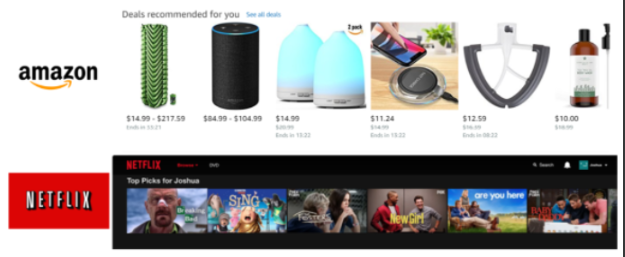

In [ ]:
# Calling 10 movie recommendation for user_id 10
rec_lists = sample_recommendation_user(model = mf_model,
                                       interactions = interactions,
                                       user_id = 10,
                                       user_dict = user_dict,
                                       item_dict = movies_dict,
                                       threshold = 4,
                                       nrec_items = 10,
                                       show = True)

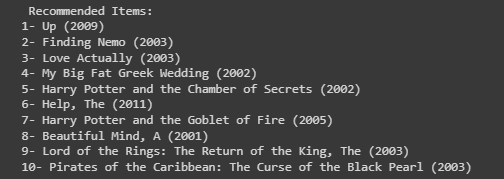

#### **b. User recommendation to a item**

In this case, we will discuss how we can recommend a list of users specific to a particular item.

Example of such cases is when you are running a promotion on an item and want to run an e-mail campaign around this promotional item to only 10,000 users who might be interested in this item.

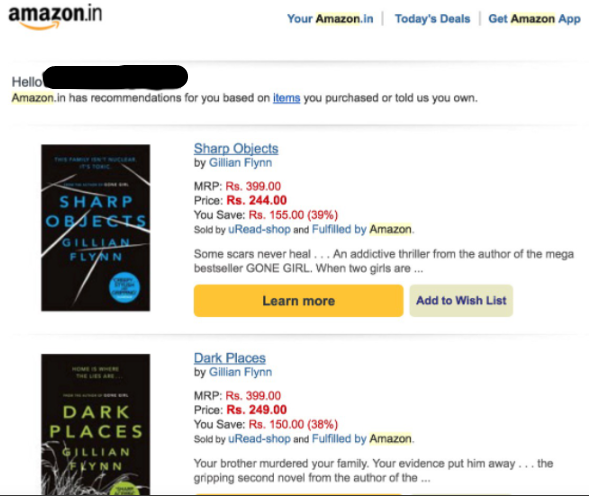

In [ ]:
## Calling 15 user recommendation for item_id 1
sample_recommendation_item(model = mf_model,
                           interactions = interactions,
                           item_id = 1,
                           user_dict = user_dict,
                           item_dict = movies_dict,
                           number_of_user = 15)

[399, 557, 189, 8, 461, 379, 549, 431, 507, 107, 394, 340, 347, 81, 257]

#### **c. Item recommendation to items**

In this case, we will discuss how we can recommend a list of items specific to a particular item.

This kind of models will help you to find similar/related items or items which can be bundled together.

Typical industry use case for such models are in cross-selling and up-selling opportunities on product page like “Products related to this item”, “Frequently bought together”, “Customers who bought this also bought this” and “Customers who viewed this item also viewed”.

“Customers who bought this also bought this” and “Customers who viewed this item also viewed” can also be solved through market basket analysis.

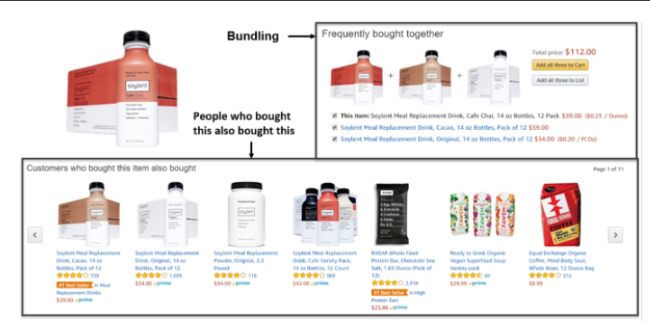

In [ ]:
## Creating item-item distance matrix
item_item_dist = create_item_emdedding_distance_matrix(model = mf_model,
                                                       interactions = interactions)
item_item_dist.head()

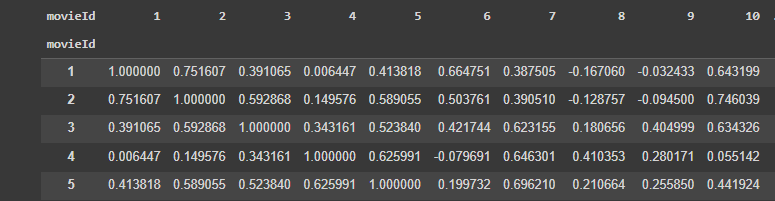

In [ ]:
## Calling 10 recommended items for item id 5378

rec_list_uc3 = item_item_recommendation(item_emdedding_distance_matrix = item_item_dist,
                                        item_id = 5378,
                                        item_dict = movies_dict,
                                        n_items = 10)

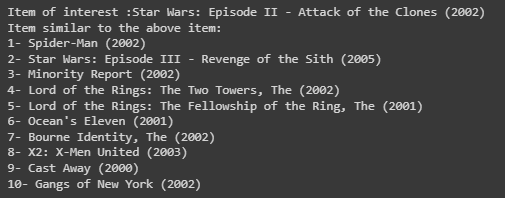

## **1.4 Challenges of Recommender system**

1. **Data Sparsity:** Too many users and items, but only a few interactions (e.g., ratings, purchases).

  * This makes it difficult for the recommender system to effectively learn user preferences and generate accurate recommendations.

2. **Cold Start Problem:**
  
  * **"User" Cold Start:** When a new user joins the system, the recommender has little or no information about their preferences and behavior. As a result, it's challenging to provide relevant recommendations to these users.
  
  * **"Item" Cold Start:** Similarly, when a new item is added to the system, there is limited data on user interactions with that item. Recommending it to the right users becomes difficult.

3. **Overfitting:** Recommender systems can overfit with sparse data, memorizing noise instead of learning meaningful patterns, leading to poorer generalization and less accurate recommendations.

4. **User Diversity:** Recommender systems aim to cater to diverse user interests but may create "filter bubbles," limiting exposure to new content.

# WORK SHOP

From [Customer segmentation](https://colab.research.google.com/drive/1pSj8xDDbR1Plrw2aERbQWNl_vtUBF0MS?usp=drive_link) integrated with Product recommender in this Chapter.

We will use Affiliate e-Commerce data to do Clustering & Product Recommender in this dataset.

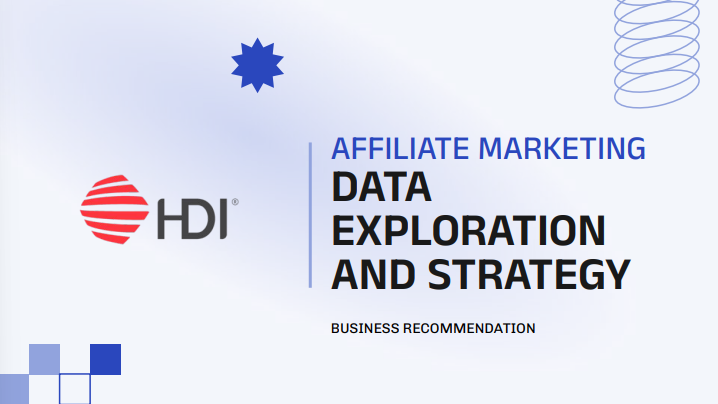

## **Business objective**

Optimization of member performance
through clusters & product recommendation.

## **Data Preparation**

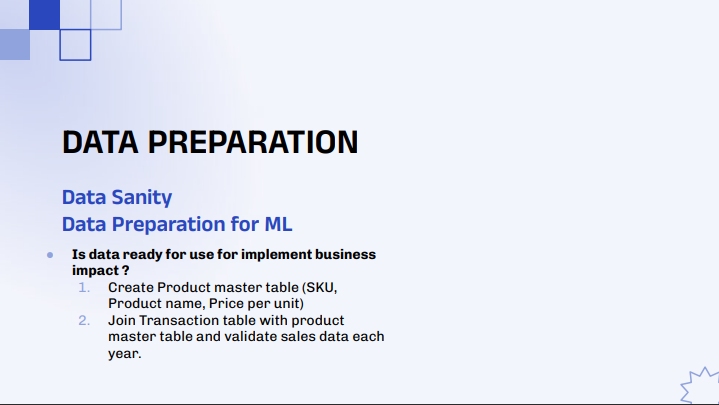

**For Data sanity:**

1. No missing values
2. No duplicate values
3. No miss spell
4. There are paid amount = 0 which located in this dataset with high amount of contribution.(Suspicious) - we use total amount to simulate segmentation & recommender.

In this case, we will create master table for "product_table" for implement business impact (Sales by sku)

For Data reconcile after create new master table of product.

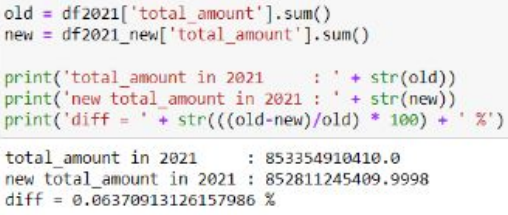

Data 0.06% diff after join and sum up total_sales to re-check.

## **Prepare data for Clustering**

### **Feature engineerings**

List of features which use for clustering.

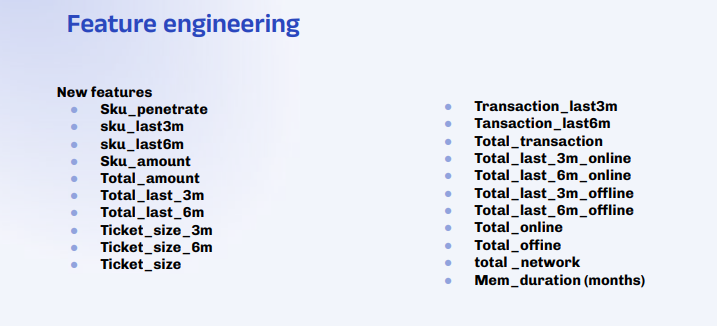


## **Machine Learning & Data Mining**

### **Clustering Methods**

**Clustering methods:** K-Median, keeping outlier to do clustering.

* **Alternative way to clustering**, extract outliers to do analysis separately or clapping outlier
and do K-means instead.

**Note:** Computation resource & time use more than K-Means

#### **Normalization**

In [ ]:
# Normalization

X = df_clus.drop('ent', axis=1)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#### **Find Optimum number of cluster**

In this case, we use "Elbow method" with K-Means for example of # optimized cluster

Note: Due to exceed of notebook resources, we can not run silhoutte score.

To improve this case, we need to find optimum number of cluster with silhoulette score, Gap Statistic, Davies-Bouldin Index and etc.

##### **Elbow Method**

In [ ]:
k_values = range(1, 10)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

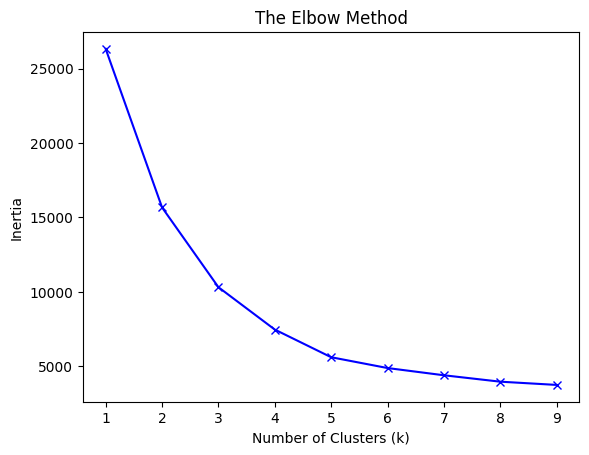

In [ ]:
# Alternative Elbow method

# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(cluster_df)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

##### **Silhoutte score**

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

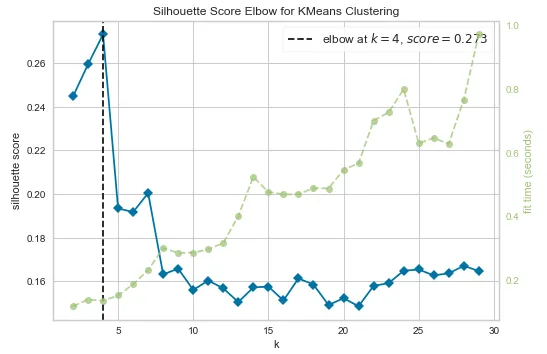

##### **Gap Statistics**

In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances

def k_median(X, centers):
    # Assign each data point to the closest center
    labels = np.argmin(pairwise_distances(X, centers), axis=1)
    return labels

def compute_k_median_WCSS(X, centers, labels):
    # Calculate the sum of distances between each data point and its assigned center
    wcss = np.sum(pairwise_distances(X, centers)[np.arange(X.shape[0]), labels])
    return wcss

def generate_random_data(low, high, size):
    # Generate random data using a uniform distribution
    return np.random.uniform(low=low, high=high, size=size)

def compute_reference_WCSS(X, max_k, B):
    reference_wcss = np.zeros(max_k)

    for k in range(1, max_k + 1):
        wcss_list = []
        for _ in range(B):
            random_centers = generate_random_data(low=np.min(X, axis=0), high=np.max(X, axis=0), size=k)
            random_labels = k_median(X, random_centers)
            wcss = compute_k_median_WCSS(X, random_centers, random_labels)
            wcss_list.append(wcss)

        reference_wcss[k - 1] = np.mean(wcss_list)

    return reference_wcss

def gap_statistic(X, max_k, B):
    actual_wcss = np.zeros(max_k)

    # Calculate the WCSS for different values of k
    for k in range(1, max_k + 1):
        centers = generate_random_data(low=np.min(X, axis=0), high=np.max(X, axis=0), size=k)
        labels = k_median(X, centers)
        actual_wcss[k - 1] = compute_k_median_WCSS(X, centers, labels)

    # Calculate the reference WCSS
    reference_wcss = compute_reference_WCSS(X, max_k, B)

    # Compute the Gap Statistic
    gap = np.log(reference_wcss) - np.log(actual_wcss)

    return gap

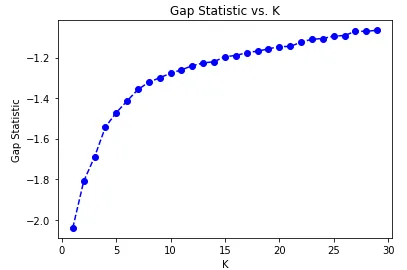

##### **Davies-Bouldin Index**

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances

def davies_bouldin_index(X, labels):
    num_clusters = len(np.unique(labels))
    cluster_centers = np.zeros((num_clusters, X.shape[1]))

    for i in range(num_clusters):
        cluster_centers[i] = np.mean(X[labels == i], axis=0)

    cluster_distances = pairwise_distances(cluster_centers)

    similarity_scores = np.zeros((num_clusters, num_clusters))

    for i in range(num_clusters):
        for j in range(num_clusters):
            if i != j:
                similarity_scores[i, j] = (np.sum(pairwise_distances(X[labels == i], X[labels == j]))
                                           / len(X[labels == i]))
    db_index = np.mean(np.max((similarity_scores + similarity_scores.T) / cluster_distances, axis=1))

    return db_index

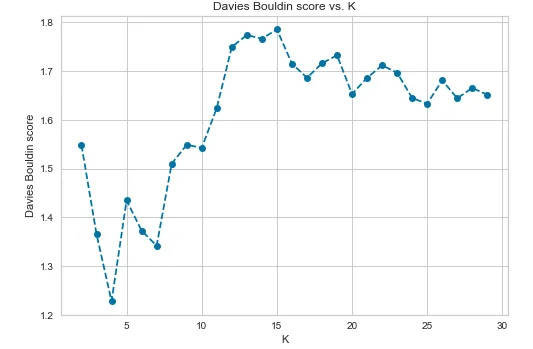

In [ ]:
from sklearn.metrics import pairwise_distances

def k_median_clustering(X, k, max_iters=500):
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    for _ in range(max_iters):
        distances = pairwise_distances(X, centroids, metric='manhattan')

        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([np.median(X[labels == i], axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

k = 5
labels_kmedian, centroids_kmedian = k_median_clustering(X, k)

df_clus['Cluster'] = labels_kmedian
df_clus.head(3)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmedian, palette='Set1')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Customer Segmentation')
plt.legend(title='Labels')

plt.show()

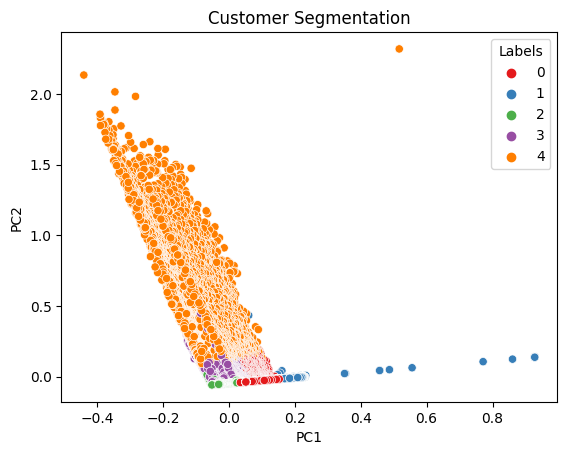

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

num_var = df_clus.select_dtypes(include=['float64', 'int64']).columns.to_list()

for i in num_var:
    fig, ax = plt.subplots()
    ax.boxplot([df_clus[df_clus['Cluster'] == '0'][i],
                df_clus[df_clus['Cluster'] == '1'][i],
                df_clus[df_clus['Cluster'] == '2'][i],
                df_clus[df_clus['Cluster'] == '3'][i],
                df_clus[df_clus['Cluster'] == '4'][i]
                ])
    ax.set_xticklabels(['0', '1','2','3','4'])
    ax.set_ylabel(i)

    p_value = f_oneway(df_clus[df_clus['Cluster'] == '0'][i],
                      df_clus[df_clus['Cluster'] == '1'][i],
                      df_clus[df_clus['Cluster'] == '2'][i],
                      df_clus[df_clus['Cluster'] == '3'][i],
                      df_clus[df_clus['Cluster'] == '4'][i]
                      )

    print(i)
    print("The ANOVA p-value is:", p_value)
    plt.show()

#### **Clustering characteristics**

In this case, we use boxplot to analyze behavior each cluster but Outlier make visualizes harder.

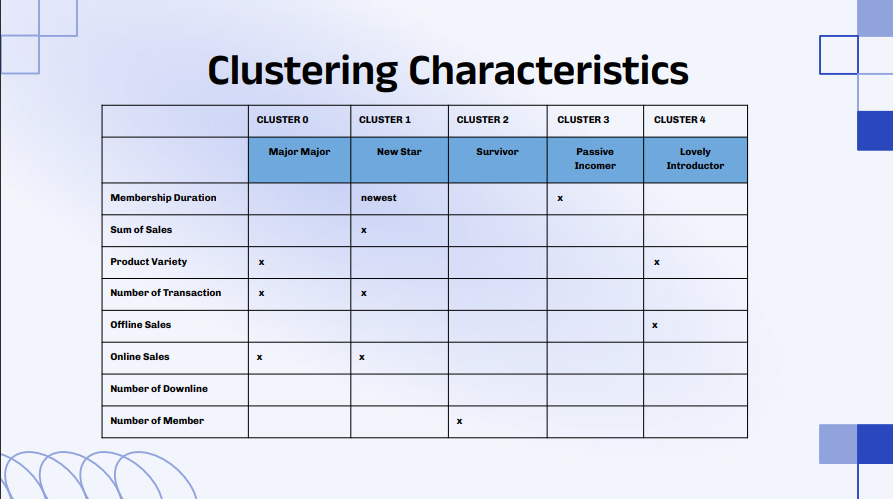

What we can improved:
Use Multi-classification(Tree-based model) integrated with SHAP value to decribe which features outstanding on each cluster.

#### **Multi-classification model with SHAP(swarm plot)**

**Coding section**

In [ ]:
import xgboost as xgb
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
X = df_clustering.drop('cluster', axis=1)
y = df_clustering['cluster'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = xgb.XGBClassifier(objective='multi:softmax', random_state=42)
model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = model.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

for i in range(model.classes_.shape[0]):
    class_name = model.classes_[i]
    print('CLUSTER: ',class_name)
    shap.summary_plot(shap_values[:, :, i], X_test)
    print('#######################')

Example of SHAP value with Explainer each cluster (cluster: 1 )

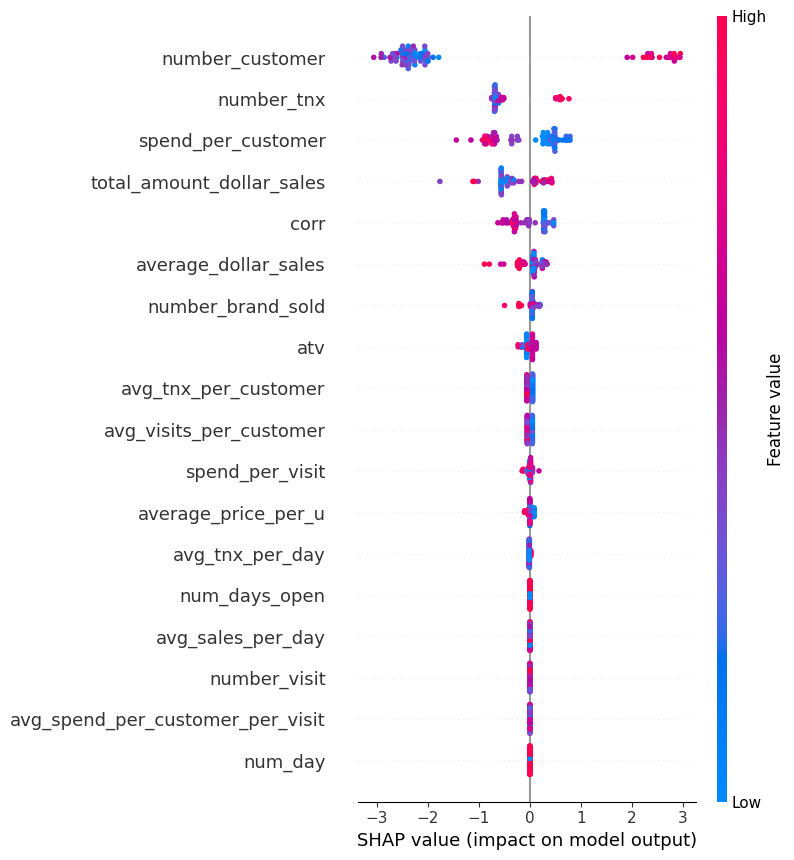

In Cluster 1, they have high amount of customer, spend per customer quite low and sales trend flat to decline trend.

#### **Segment strategy by cluster**

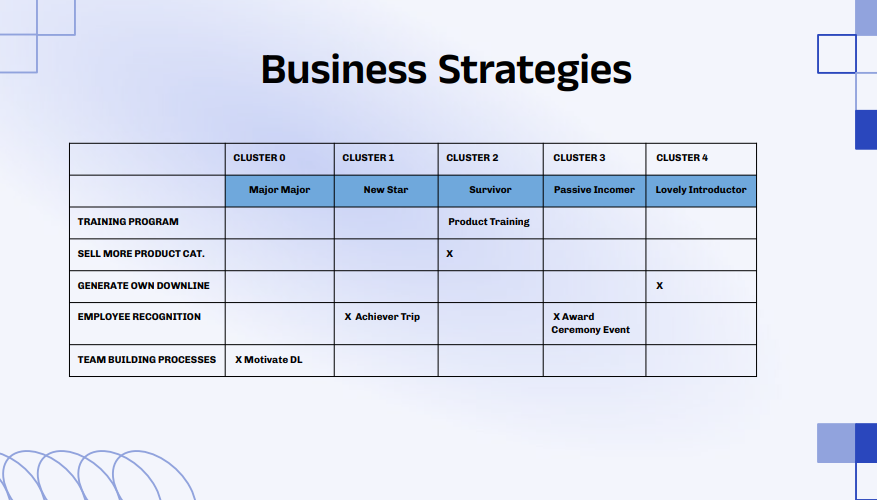

##### **What we can improve**

1. Analyse Behavior & Demographic each cluster, which category they buy the most, who they are, where they buyand etc. to create the strategy.

2. Re-calculate the K-Median centroids for business implementation if the number of customers dosn't make sense.

### **Product recommendation**

In this case, we will use **"Basket analysis"** instead of "Matrix Factorization" because our data need to prepare explicit rating by quintile of sales(1-5).

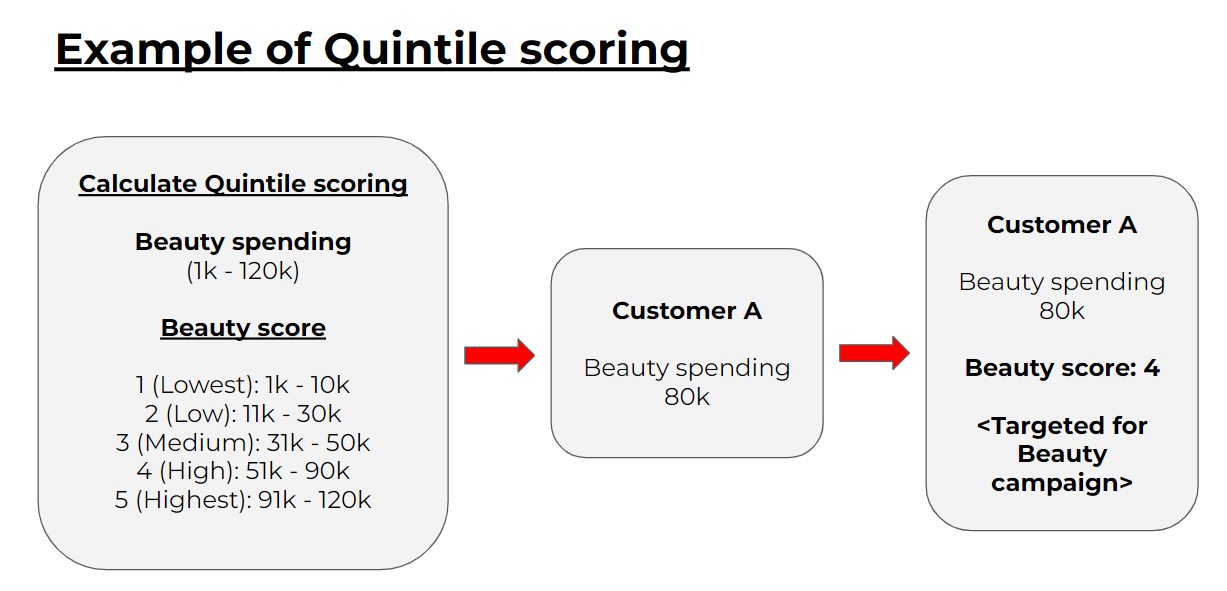

#### **Basket Analysis - Pros & Cons**

* **Pros:**

 * **Easy Interpretability:** easy to interpret, particularly for market basket analysis. It reveals item co-occurrences and associations in transactional data, aiding in understanding customer behavior and making decisions regarding product placements or promotions.

 * **Quick Insights:** Identify frequent itemsets and association rules from transactional data without complex mathematical calculations.

 * **Scalability:** Computationally efficient for small datasets and can handle a large number of items easily.

* **Cons:**

 * **Limited Application:** Basket analysis is suitable for categorical binary data, but not as effective for numerical or continuous data.

 * **Does Not Capture Item Preferences:** Basket analysis identifies item associations but doesn't reveal user/item preferences or data structure.

#### **Matrix Factorization - Pros & Cons**

* **Pros:**

 * **Personalization:** Matrix factorization is widely used in recommendation systems to model user-item interactions and capture personalized preferences. It can suggest relevant items to users based on their historical interactions.

 * **Handling Missing Data:** Matrix factorization can handle missing data effectively. It allows you to fill in the missing entries in the matrix based on the learned factors.

 * **Flexibility:** Matrix factorization can be applied to various types of data, including numerical ratings, implicit feedback, and even textual data with appropriate transformations.

* **Cons:**

 * **Complexity:** Matrix factorization involves complex mathematical calculations, such as optimization techniques, which may require specialized algorithms and computations.

 * **Cold Start Problem:** Matrix factorization can face challenges when dealing with new items or new users (cold start problem) because it relies on historical interactions to make recommendations.

 * **Sparsity:** When the user-item interaction matrix is sparse (many missing entries), matrix factorization may suffer from a lack of data to learn accurate representations.

### **Code for Basket analysis (Apriori rules)**

In [ ]:
import os

df_list = [df_cluster_0, df_cluster_1, df_cluster_2, df_cluster_3, df_cluster_4]

for i, df in enumerate(df_list):
    df_prep = df.sort_values(by='payment_date')
    df_prep = df_prep[['trans_id', 'product']].drop_duplicates()
    df_group = df_prep.groupby(['trans_id'])['product'].apply('|'.join).reset_index()

    df_trans = df_group['product'].str.get_dummies('|').astype(pd.SparseDtype('bool'))
    print(f"df_trans_{i} shape:", df_trans.shape)

    frequent_itemsets = apriori(df_trans, min_support=0.02, use_colnames=True)
    frequent_itemsets.sort_values('support', ascending=False, inplace=True)

    asso_rule = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
    asso_rule.sort_values('confidence', ascending=False, inplace=True)

    print(f"Association rules for df_cluster_{i}:")
    display(asso_rule)

Our assumption is that we will conduct Basket analysis across clusters because each cluster exhibits different customer behaviors.

**Note:** If we are aware of the promotion SKU, we should exclude it from this analysis to avoid biasing our apriori rules.

**Tips for running Apriori**
* **Preprocess the Data:** Sprase Dtype into "bool" instead of numeric (0/1) can save up memory around 20-30%

* **Choose an Appropriate Minimum Support:**Avoid, setting frequent min_support to low lead to memory crashed.

* **Choose a Suitable Measure:** Set up lift metrics > 1 to select item which buy indepent for each other.
(When the lift metric is greater than 1, it indicates that the two items are bought together more often than expected by chance)

### **Basket analysis implementation**

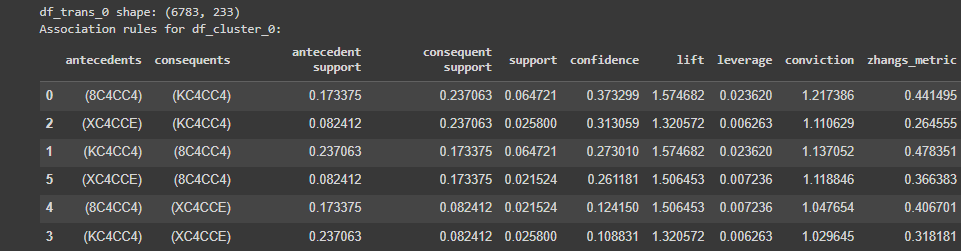

After we run basket analysis, we can see which SKU or set of SKU buy the most which we can do Cross-selling items for the promotion.

**What we can improve**

* Turn basket analysis into business impact (Sales)
  * **Identify High-Leverage Rules:** Focus on association rules with high confidence, support, and lift values. High-lift rules indicate strong dependencies between items and suggest that promoting one item might boost the sales of another item.

  * **A/B Testing:** Implement A/B testing to assess the impact of changes based on association rules. Compare sales performance and conversion rates before and after implementing personalized recommendations, promotional strategies, or store layout changes.

  * **Post analysis:** Visualize confidence heat map to see which item with buy next.

  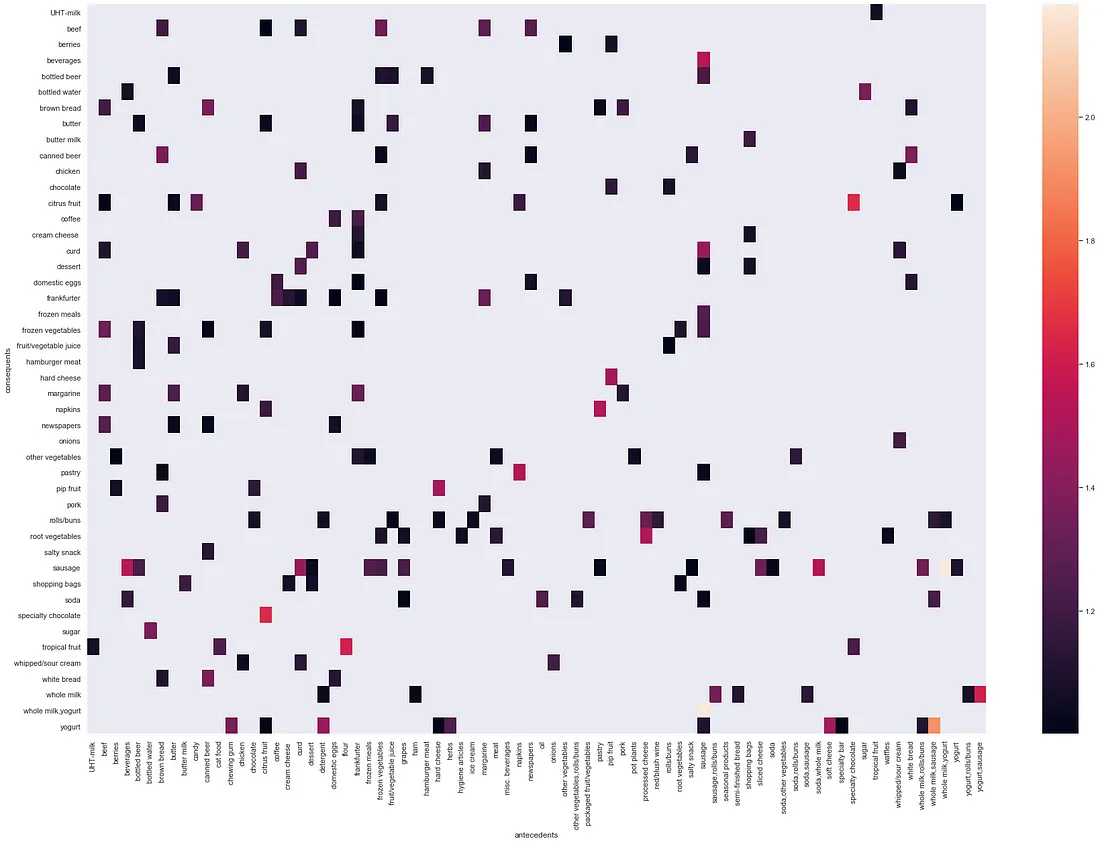



